In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from tile_mate import get_raster_from_tiles
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [12]:
%%time

bounds = [-120.55, 34.85, -120.25, 35.15]

X, p = get_raster_from_tiles(bounds, 
                             tile_shortname='esa_world_cover_2021')
X.shape

0
CPU times: user 308 ms, sys: 79.1 ms, total: 387 ms
Wall time: 7.2 s


(1, 3600, 3600)

# Plotting

This is mainly thanks to Alex Handwerger.

In [15]:
legend_data = p['tags']['legend'].split('\n')
legend_data = list(filter(lambda x: x, legend_data))
ticks = [int(d.split()[0]) for d in legend_data]
tick_labels = [d.split()[1] for d in legend_data]
ticks, tick_labels

([10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100],
 ['Tree',
  'Shrubland',
  'Grassland',
  'Cropland',
  'Built-up',
  'Bare/sparse',
  'Snow',
  'Permanent',
  'Herbaceous',
  'Mangroves',
  'Moss'])

In [16]:
legend_data = p['tags']['legend'].split('\n')
legend_data = list(filter(lambda x: x, legend_data))
ticks = [int(d.split()[0]) for d in legend_data]
tick_labels = [' '.join(d.split()[1:]) for d in legend_data]
ticks, tick_labels

([10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100],
 ['Tree cover',
  'Shrubland',
  'Grassland',
  'Cropland',
  'Built-up',
  'Bare/sparse vegetation',
  'Snow and ice',
  'Permanent water bodies',
  'Herbaceous wetland',
  'Mangroves',
  'Moss and lichen'])

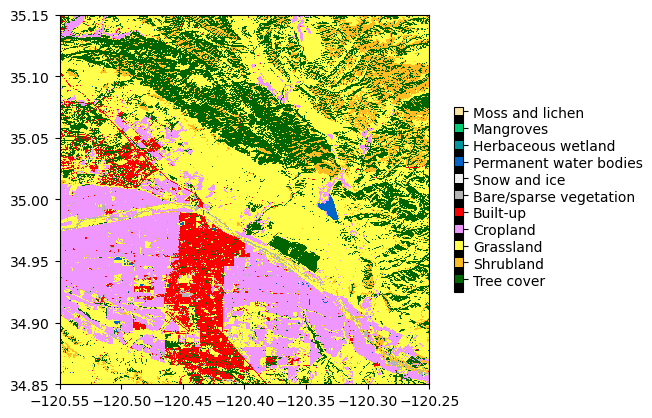

In [17]:
fig, ax = plt.subplots()

colormap = p['colormap'][1]  # We store each colormap as a dictionary associated to its channel
cmap = ListedColormap([np.array(colormap[key]) / 255 for key in range(256)])
im_data = show(X[0, ...], 
               transform=p['transform'], 
               cmap=cmap, 
               interpolation='none', 
               vmin=0, 
               vmax=255, 
               ax=ax)

im = im_data.get_images()[0]
bounds_fig = sorted([0] + [t - .5 for t in ticks] + [t + .5 for t in ticks])
cbar=fig.colorbar(im, 
                  ax=ax, 
                  shrink=0.5, 
                  pad=0.05, 
                  boundaries=bounds_fig, 
                  cmap=cmap,
                  ticks=np.array(ticks)
                 ) 
norm = colors.BoundaryNorm(bounds_fig, cmap.N)
cbar.set_ticklabels(tick_labels)

# Serialize with Colorbar

In [18]:
import rasterio

with rasterio.open('esa_worlf_cover_2021_subset_color.tif', 'w', **p) as ds:
    ds.write(X)
    ds.write_colormap(1, p['colormap'][1])